Import the necessary libraries
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, r2_score, mean_squared_error, roc_curve, auc, classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Import data from my google drive
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_data = pd.read_csv('/content/drive/My Drive/COMP4211/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/COMP4211/test.csv')

Mounted at /content/drive


**Part 1: Data Exploration and Preparation**
===
**Load the provided train.csv file using pandas. Write code to perform an initial data exploration
to understand the basic statistics about all the attributes and target variables. Although you
need to run the code to explore this dataset, you need to answer the questions [Q1] to [Q6] on
the training set.**

[Q1] Dataset Overview
---
• Size of the Dataset: Total number of instances and features

• Feature Types: Identify numerical and categorical features

In [ ]:
print("Training data size:", train_data.shape, "; Number of instance:", train_data.shape[0] * train_data.shape[1])
print("Test data size:", test_data.shape, "; Number of instance:", test_data.shape[0] * test_data.shape[1])
print("Number of features:", train_data.shape[1], "\n")

numerical_features = train_data.select_dtypes(include=["int64", "float64"])
categorical_features = train_data.select_dtypes(include=["object"])

print("Numerical features include:", numerical_features.columns.tolist())
print("Categorical features include:", categorical_features.columns.tolist())

Training data size: (196817, 36) ; Number of instance: 7085412
Test data size: (49205, 36) ; Number of instance: 1771380
Number of features: 36 

Numerical features include: ['BMI', 'PhysicalHealthDays', 'SleepHours', 'MentalHealthDays', 'Age', 'HadHeartAttack']
Categorical features include: ['RaceEthnicityCategory', 'PneumoVaxEver', 'LastCheckupTime', 'SmokerStatus', 'HadAngina', 'HadDepressiveDisorder', 'DifficultyConcentrating', 'RemovedTeeth', 'BlindOrVisionDifficulty', 'GeneralHealth', 'HadSkinCancer', 'HighRiskLastYear', 'ECigaretteUsage', 'ChestScan', 'HadStroke', 'FluVaxLast12', 'Sex', 'HadDiabetes', 'HadKidneyDisease', 'AlcoholDrinkers', 'DeafOrHardOfHearing', 'CovidPos', 'HadAsthma', 'DifficultyWalking', 'HadCOPD', 'HadArthritis', 'DifficultyDressingBathing', 'HIVTesting', 'PhysicalActivities', 'DifficultyErrands']


[Q2] Missing Values
---
• Identification: Report any features with missing values and the proportion of missing
values for them

• Potential Impact: Briefly discuss how these missing values might affect analysis and
model performance

In [ ]:
missing_train = train_data.isnull().sum()
print("The missing values:", missing_train[missing_train>0])
print("The proportion of missing value:", (missing_train[missing_train>0].values/train_data.shape[0]))

The missing values: BMI    8258
dtype: int64
The proportion of missing value: [0.04195776]


[Q3] Feature Distribution
---
• Numerical Features: Identify which ones are discrete or continuous. Describe the distribution (i.e., mean, median, range, standard deviation) of all numerical features, and
visualize the distribution of one of the numerical features using a box plot.

• Categorical Features: Identify which ones are binary, nominal, or ordinal. Select 2 of
the categorical features, summarize the count of categories for each, and visualize their
distributions using bar plots

Discrete numerical features:

In [ ]:
discrete_numerical_features = train_data.select_dtypes(include=['int64'])
print("Discrete Numerical Features:", discrete_numerical_features.columns.tolist())

discrete_mean = discrete_numerical_features.mean()
discrete_median = discrete_numerical_features.median()
discrete_range = discrete_numerical_features.max() - discrete_numerical_features.min()
discrete_std = discrete_numerical_features.std()

print("Mean:",discrete_mean.values)
print("Median:",discrete_median.values)
print("Range:",discrete_range.values)
print("Standard Deviation:", discrete_std.values)

Discrete Numerical Features: ['HadHeartAttack']
Mean: [0.05460402]
Median: [0.]
Range: [1]
Standard Deviation: [0.22720626]


Continuous numerical features:

Continuous Numerical Features: ['BMI', 'PhysicalHealthDays', 'SleepHours', 'MentalHealthDays', 'Age']
Mean: [28.67741991  4.1184857   7.02046571  4.17740337 55.75017097]
Median: [27.46  0.    7.    0.   57.5 ]
Range: [85.63 30.   23.   30.   65.4 ]
Standard Deviation: [ 6.51453789  8.40512709  1.44155149  8.11269354 17.55112943]


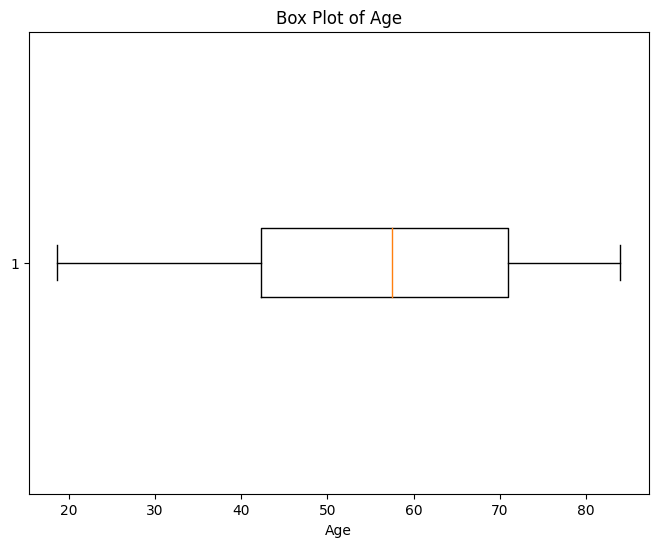

In [ ]:
continuous_numerical_features = train_data.select_dtypes(include=['float64'])
print("Continuous Numerical Features:", continuous_numerical_features.columns.tolist())

continuous_mean = continuous_numerical_features.mean()
continuous_median = continuous_numerical_features.median()
continuous_range = continuous_numerical_features.max() - continuous_numerical_features.min()
continuous_std = continuous_numerical_features.std()

print("Mean:",continuous_mean.values)
print("Median:",continuous_median.values)
print("Range:",continuous_range.values)
print("Standard Deviation:", continuous_std.values)

random_feature = random.choice(continuous_numerical_features.columns)

data_without_null = train_data.dropna(subset=[random_feature])

plt.figure(figsize=(8, 6))
plt.boxplot(data_without_null[random_feature], vert=False)
plt.title('Box Plot of ' + random_feature)
plt.xlabel(random_feature)
plt.show()

Categorical features:

['PneumoVaxEver', 'HadAngina', 'HadDepressiveDisorder', 'DifficultyConcentrating', 'BlindOrVisionDifficulty', 'HadSkinCancer', 'HighRiskLastYear', 'ChestScan', 'HadStroke', 'FluVaxLast12', 'Sex', 'HadKidneyDisease', 'AlcoholDrinkers', 'DeafOrHardOfHearing', 'HadAsthma', 'DifficultyWalking', 'HadCOPD', 'HadArthritis', 'DifficultyDressingBathing', 'HIVTesting', 'PhysicalActivities', 'DifficultyErrands']


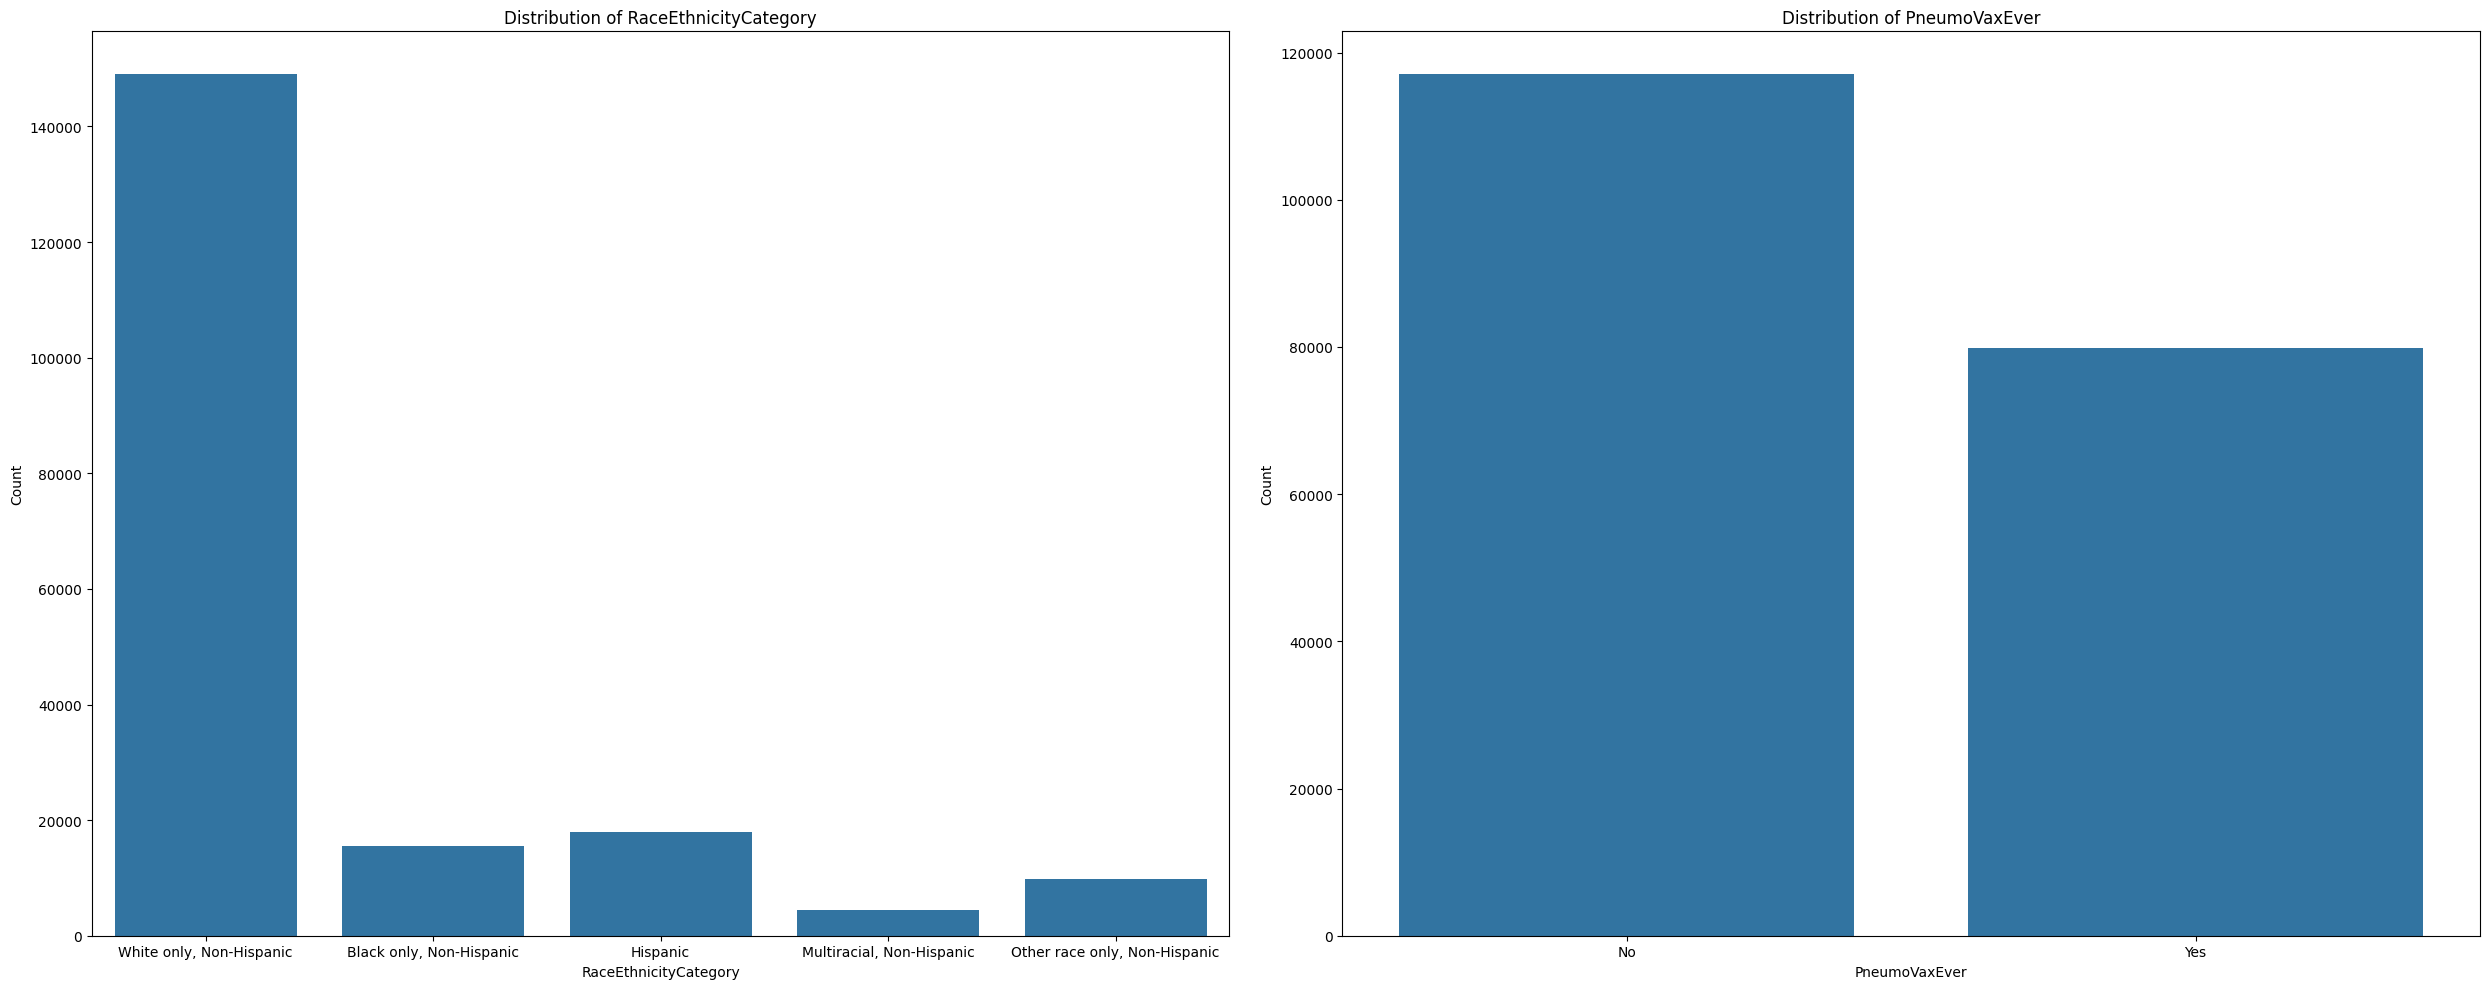

In [ ]:
binary = []
for column in categorical_features.columns:
  unique_values = train_data[column].nunique()
  if unique_values == 2:
    #print(f"{column} is a binary feature.")
    binary.append(column)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

for i, column in enumerate(categorical_features.columns[:2]):
  sns.countplot(data=categorical_features, x=column, ax=axes[i])
  axes[i].set_title(f'Distribution of {column}')
  axes[i].set_xlabel(column)
  axes[i].set_ylabel('Count')

print(binary)
plt.tight_layout()
plt.show()

#Ordinal: LastCheukupTime, RemovedTeeth, GeneralHealth, ECigaretteUsage
#Nominal: RaceEthnicityCategory, SmokerStatus, HadDiabetes, CovidPos

[Q4] Correlation Analysis
---
• Feature Correlation: Visualize the correlation between every two features (numerical
features only, including the regression targets) with a heatmap. You can use matplotlib
and seaborn to help you

• Insights: Highlight any strong correlations that might influence feature selection or necessitate feature engineering

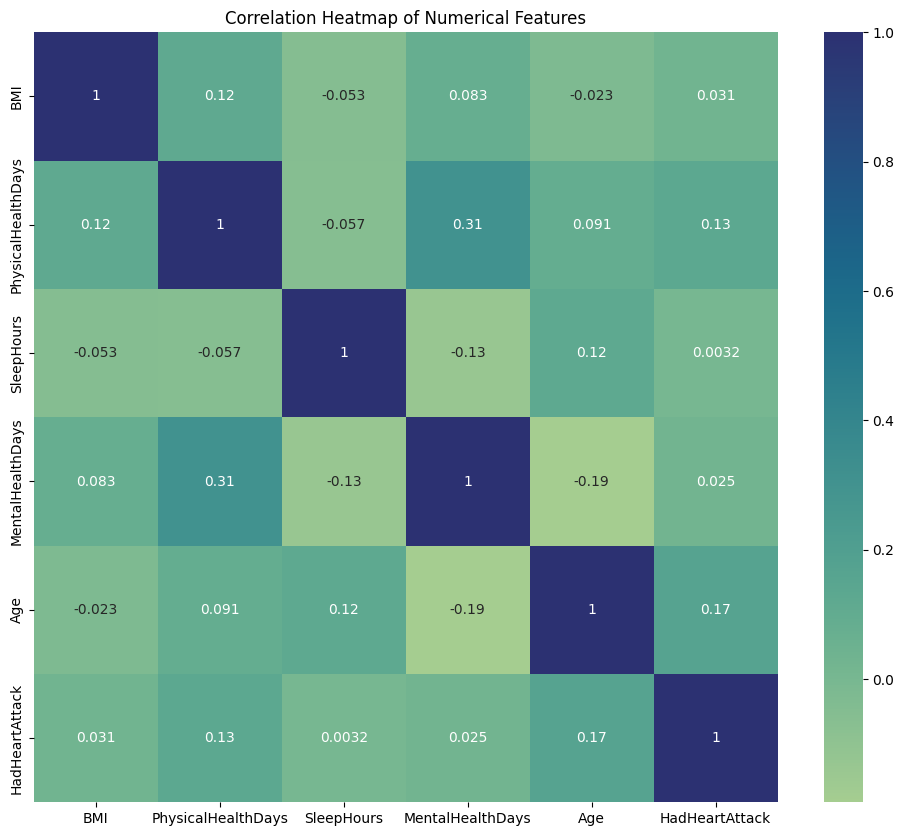

In [ ]:
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="crest", annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

**Part 2: Data Preprocessing Techniques**
---

[Q5] Handling Missing Values:
---
Apply SimpleImputer to handle missing values. Briefly discuss its impact on feature distribution and model performance. Briefly discuss what imputation
strategies (mean, median, mode, and constant) should be used for what reasons.


In [ ]:
imputer = SimpleImputer(strategy="mean")
imputed_data = imputer.fit_transform(numerical_features)
numerical_features_imputed = pd.DataFrame(imputed_data, columns=numerical_features.columns)

[Q6] Normalization and Standardization:
---
Normalize/standardize different types of numerical features using StandardScaler, MinMaxScaler, or RobustScaler. You need to report the
first numerical feature column of the first 10 samples before and after processing. Briefly discuss
the difference between these techniques and when to use each.

In [ ]:
print("Before Processing:")
print(numerical_features.iloc[:10, 0])

standard_scaled_data = StandardScaler().fit_transform(numerical_features_imputed.values)
min_max_scaled_data = MinMaxScaler().fit_transform(numerical_features_imputed.values)
robust_scaled_data = RobustScaler().fit_transform(numerical_features_imputed.values)

standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=numerical_features_imputed.columns)
#print(standard_scaled_df)
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=numerical_features_imputed.columns)
robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=numerical_features_imputed.columns)


print("\nAfter Standard Scaling:")
print(standard_scaled_data[:10,0])
print("\nAfter Min-Max Scaling:")
print(min_max_scaled_data[:10,0])
print("\nAfter Robust Scaling:")
print(robust_scaled_data[:10,0])


Before Processing:
0    25.10
1    22.60
2    33.45
3    23.11
4    32.89
5    20.18
6    32.49
7    24.33
8    35.44
9    21.77
Name: BMI, dtype: float64

After Standard Scaling:
[-0.56104168 -0.95311313  0.74847696 -0.87313055  0.66065295 -1.33263829
  0.59792152 -0.68179969  1.06056583 -1.08328085]

After Min-Max Scaling:
[0.1527502  0.12355483 0.25026276 0.12951069 0.24372299 0.09529371
 0.23905173 0.14375803 0.27350228 0.11386196]

After Robust Scaling:
[-0.38589212 -0.73167358  0.76901798 -0.66113416  0.69156293 -1.06639004
  0.6362379  -0.49239281  1.04426003 -0.84647303]


[Q7] Encoding Categorical Variables:
---
Utilize OneHotEncoder and OrdinalEncoder to encode different types of categorical variables.
For certain ordinal feature(s), a direct application of
the OrdinalEncoder may lead to a suboptimal ranking between categories.
You need to handle this by adjusting the settings within the OrdinalEncoder. Additionally, you need to report the
entire table in the jupyter notebook, showing the first 10 samples before and after processing
in pandas.DataFrame structure. Briefly explain the scenarios where each encoding technique is
preferred.

In [ ]:
print("Before Processing:")
print(categorical_features.head(10))

binary_features = categorical_features.nunique().loc[lambda x:x==2].index.tolist()
ordinal_features = {
    'LastCheckupTime': ['Within past year (anytime less than 12 months ago)',
                        '1 year but less than 2 years ago (Within past 2 years)',
                        '2 year but less than 5 years ago (Within past 5 years)',
                        '5 or more years ago'],
    'RemovedTeeth': ['0', '1 to 5', '6 or more, but not all', 'All'],
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'ECigaretteUsage': ['Never used e-cigarettes in my entire life', 'Not at all (right now)', 'Use them a few days', 'Use them every day']
}
nominal_features = ['RaceEthnicityCategory', 'SmokerStatus', 'HadDiabetes', 'CovidPos']
all_cate_features_name = categorical_features.columns.tolist()

print("\nAfter Processing:")
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(categorical_features[all_cate_features_name]) #Turn categories into 1s and 0s
one_hot_data = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(all_cate_features_name))
print(one_hot_data.head(10))

ordinal_encoder = OrdinalEncoder(categories=list(ordinal_features.values()))
ordinal_encoded = ordinal_encoder.fit_transform(train_data[list(ordinal_features.keys())]) #(196817, 22), fit() + transform(): Learned the data
ordinal_data = pd.DataFrame(ordinal_encoded, columns=ordinal_features.keys())
print(ordinal_data.head(10))


Before Processing:
       RaceEthnicityCategory PneumoVaxEver  \
0   White only, Non-Hispanic            No   
1   White only, Non-Hispanic            No   
2   White only, Non-Hispanic           Yes   
3   White only, Non-Hispanic            No   
4   White only, Non-Hispanic            No   
5   Black only, Non-Hispanic            No   
6                   Hispanic            No   
7  Multiracial, Non-Hispanic            No   
8   White only, Non-Hispanic            No   
9   White only, Non-Hispanic           Yes   

                                     LastCheckupTime  \
0  1 year but less than 2 years ago (Within past ...   
1  Within past year (anytime less than 12 months ...   
2  Within past year (anytime less than 12 months ...   
3  Within past year (anytime less than 12 months ...   
4  Within past year (anytime less than 12 months ...   
5  Within past year (anytime less than 12 months ...   
6  Within past year (anytime less than 12 months ...   
7                         

[Q8] Feature Selection:
---
Perform feature selection with either feature selection modules in
scikit-learn, such as SelectKBest, or based on the correlation analysis on all features (including numerical and categorical features) similar to [Q5]. Think about how feature selection
impacts the performance of your models. You need to report which features were removed for
what reasons.

In [ ]:
target_regression  = train_data['Age']

original_categorical_features = categorical_features.columns.tolist()
#print(original_categorical_features)
filtered_encoded_data = one_hot_data.loc[:, ~one_hot_data.columns.isin(original_categorical_features)]
#print(filtered_encoded_data)
adjusted_numerical_features = numerical_features_imputed.select_dtypes(include=['float64', 'int64']).drop(columns=['Age'])
combined_data = pd.concat([adjusted_numerical_features.reset_index(drop=True), filtered_encoded_data.reset_index(drop=True)], axis=1)

#k_best_selector = SelectKBest(score_func=f_classif, k='all')
k_best_selector = SelectKBest(score_func=f_classif, k=10) #k is adjustable

k_best_selector.fit(combined_data, target_regression)
feature_scores = pd.DataFrame({'Feature': combined_data.columns, 'Score': k_best_selector.scores_})
sorted_feature_scores = feature_scores.sort_values(by='Score', ascending=False)

#print(original_categorical_features)
selected_features_mask = k_best_selector.get_support()
selected_features = combined_data.columns[selected_features_mask]

print("\nSorted Feature Scores:")
print(sorted_feature_scores.to_string(index=False))

print("\nSelected Features (Top 10):")
print(selected_features.tolist())




Sorted Feature Scores:
                                                               Feature      Score
                                                     PneumoVaxEver_Yes 136.999799
                                                      HadArthritis_Yes  69.047212
                                                        HIVTesting_Yes  41.328554
                                                      FluVaxLast12_Yes  37.222033
                                                         ChestScan_Yes  31.126586
                                                     HadSkinCancer_Yes  30.162218
    LastCheckupTime_Within past year (anytime less than 12 months ago)  28.067824
                                               DeafOrHardOfHearing_Yes  25.321435
                                                 DifficultyWalking_Yes  24.735452
                                                  HighRiskLastYear_Yes  20.337726
                        RaceEthnicityCategory_White only, Non-Hispanic  20

**Part 3: Regression**
===

6.1 Linear Regression
---
In this task, you will build multiple linear regression models in the first step, where each model
uses only one feature to determine its correlation with the regression target (the second last
column ‘Age’). In this stage, you only need to focus on binary categorical and continuous
numerical features.
Then, in the second step, you will build another linear regression model using the features that
yield the best performance in your experiment to explore their relationship with the regression
target.
You are required to use the train test split submodule in scikit-learn to split the data in
train.csv, with 80% for training and 20% for validation. You should set random state = 4211
for reproducibility.

In [ ]:
binary_categorical_features_filtered = combined_data.select_dtypes(include=["object"]).apply(lambda x: x.nunique() == 2)

continuous_numerical_features_filtered = combined_data.select_dtypes(include=['float64'])
scaler = StandardScaler()
normalized_values = scaler.fit_transform(continuous_numerical_features_filtered)

normalized_numerical_df = pd.DataFrame(normalized_values, columns=continuous_numerical_features_filtered.columns)
combined_data[continuous_numerical_features_filtered.columns] = normalized_numerical_df
combined_features = pd.concat([binary_categorical_features_filtered, combined_data], axis=1)
combined_features = combined_features.loc[:, combined_features.notna().any(axis=0)]


[Q9] R2 Score + [Q10] MSE
---
After training multiple models described above using the training set, use them to make
predictions on the validation set. Report the validation R2 score of each of the models to evaluate
the relationship between different features and the regression target.


Report the mean squared error of each of the models in the validation set and compare them based on the two performance metrics, i.e., R2 score and Mean Squared Error (MSE).

In [ ]:
train_data[['BMI']] = imputer.fit_transform(train_data[['BMI']]) #there are null values

numerical_data = train_data[numerical_features.columns]
#print(numerical_data.columns)

#print("hehehe",combined_features)
X = combined_features
Y = min_max_scaled_df['Age']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=4211)

r2_scores = {} #to be appended in the future
mse_scores = {}
training_times = {}

for feature in X_train.columns: #Single regression w.r.t to each feature
  X_train_feature = X_train[[feature]]
  X_val_feature = X_val[[feature]]

  start_time = time.time()

  model_lr = LinearRegression()
  model_lr.fit(X_train_feature, Y_train)

  training_times[feature] = time.time() - start_time

  predictions = model_lr.predict(X_val_feature)
  r2 = r2_score(Y_val, predictions)
  r2_scores[feature] = r2

  mse = mean_squared_error(Y_val, predictions)
  mse_scores[feature] = mse

print("R2 Score and MSE Score for each feature:")

results_df = pd.DataFrame({
    'Feature': r2_scores.keys(),
    'R2 Score': r2_scores.values(),
    'MSE': mse_scores.values(),
    'Training Time (seconds)': training_times.values()
})
print(results_df.to_string())

top_features = [feature for feature, score in r2_scores.items() if score > 0.005] #Set threshold to something
print("\nTop features based on R2 scores:", top_features)
print("There are", len(top_features), "features in best features.")

if len(top_features) > 0: #if non-empty, train the final model
  X_train_best = X_train[top_features]
  X_val_best = X_val[top_features]

  final_model_lr = LinearRegression()

  start_time = time.time()
  final_model_lr.fit(X_train_best,Y_train)

  final_training_time = time.time() - start_time

  final_predictions = final_model_lr.predict(X_val_best)
  final_r2 = r2_score(Y_val, final_predictions)
  final_mse = mean_squared_error(Y_val, final_predictions)

  final_results_df = pd.DataFrame({
      'Feature': ['Final Model'],
      'R2 Score': [final_r2],
      'MSE': [final_mse],
      'Training Time (seconds)': [final_training_time]
  })

  print("\nFinal Model Results:")
  print(final_results_df.to_string())
else:
  print("No features.")


R2 Score and MSE Score for each feature:
                                                                   Feature  R2 Score       MSE  Training Time (seconds)
0                                                                      BMI  0.000360  0.071675                 0.028026
1                                                       PhysicalHealthDays  0.008493  0.071092                 0.017293
2                                                               SleepHours  0.014153  0.070686                 0.020280
3                                                         MentalHealthDays  0.037071  0.069043                 0.014631
4                                                           HadHeartAttack  0.027283  0.069745                 0.014923
5                                           RaceEthnicityCategory_Hispanic  0.026971  0.069767                 0.016109
6                          RaceEthnicityCategory_Multiracial, Non-Hispanic  0.004747  0.071360                 0.016198

[Q11] Weight
---
Discuss the mathematical meaning of the weight (in brief) for a binary categorical independent variable. How can a nominal categorical feature with more than 2 possible values
be formulated as the independent variable of a linear model? Include the necessary component
of the nominal categorical features alongside the previously selected features to enhance the
model's performance compared to [Q9-Q10]. Report the validation R2 score and MSE of this
linear regression model.
3


**6.2 Feedforward Neural Networks**
---
In this part, you are asked to use the features selected in Section 6.1 to train feedforward neural
networks.

You need to try different numbers of hidden units H ∈ {1, 8, 32, 128} to build different three-
hidden-layer neural networks. The hyperparameter early stopping can be set to 'True' to
avoid overfitting (default is 'False'). The other hyperparameters may just take their default values.

For each hidden layer in a specific neural network model, the number of hidden units
should be kept the same for simplicity. During training, you are expected to record the training
time of each model.

After training, evaluate your models by reporting the R2 scores on the
validation set. You have to report the R2 score for each value of H by plotting them using
matplotlib.

[Q12] Model report
---
Report the model setting, training time, and performance of the neural network model
for each value of H. You are also expected to repeat each setting three times for the same
hyperparameter setting and report the mean and standard deviation of the training time, R2
and MSE score for each setting.

In [ ]:
hidden_units = [1, 8, 32, 128]
results = []

for units in hidden_units:
  train_times = []
  mse_scores = []
  r2_scores = []

  for _ in range(3):
    model = MLPRegressor(hidden_layer_sizes=(units,), random_state=4211, early_stopping = True)

    start_time = time.time()
    model.fit(X_train, Y_train)
    end_time = time.time()

    train_times.append(end_time - start_time)
    predictions = model.predict(X_val)

    mse = mean_squared_error(Y_val, predictions)
    r2 = r2_score(Y_val, predictions)
    mse_scores.append(mse)
    r2_scores.append(r2)

    results.append({
      'hidden_units': units,
      'mean_train_time': np.mean(train_times),
      'std_train_time': np.std(train_times),
      'mean_mse': np.mean(mse_scores),
      'std_mse': np.std(mse_scores),
      'mean_r2': np.mean(r2_scores),
      'std_r2': np.std(r2_scores),
  })

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

    hidden_units  mean_train_time  std_train_time  mean_mse  std_mse  \
0              1        23.847599        0.000000  0.034110      0.0   
1              1        17.935216        5.912384  0.034110      0.0   
2              1        15.722444        5.752991  0.034110      0.0   
3              8        25.307992        0.000000  0.028151      0.0   
4              8        25.225370        0.082622  0.028151      0.0   
5              8        25.355542        0.196063  0.028151      0.0   
6             32        16.402579        0.000000  0.027693      0.0   
7             32        16.153092        0.249487  0.027693      0.0   
8             32        16.009109        0.288025  0.027693      0.0   
9            128        52.107793        0.000000  0.027873      0.0   
10           128        51.051422        1.056371  0.027873      0.0   
11           128        50.129849        1.562863  0.027873      0.0   

     mean_r2  std_r2  
0   0.524280     0.0  
1   0.524280     

[Q13] Training Time and R2 Score
---
Compare the training time and R2 score of the linear regression model and the best neural
network model.

[Q14] Trend of R2 and MSE Score
---
Do you notice any trend of R2 and MSE score when you increase the hidden layer size from
1 to 128? Explain the difference between the two metrics in evaluating regression models.

**Part 4: Classification**
---

In this task, you will build a logistic regression model as well as neural network classifiers
to predict whether or not the classification target 'HadHeartAttack' is 'true'. You are also
required to use the train test split submodule in scikit-learn to split the data, with 80%
for training and 20% for validation. As before, we ask that you set random state = 4211 for
reproducibility.

7.1 Logistic Regression
---
Learning of the logistic regression model should use a gradient-descent algorithm by minimizing
the cross-entropy loss. It requires that the step size parameter η be specified.

Try out a
few values (<1) and choose one that leads to stable convergence. You may also decrease η
gradually during the learning process to enhance convergence. When set properly, this can be
done automatically in scikit-learn. Use the features selected in [Q8] to train the model.

During training, record the training time for the logistic regression model. After training, you
are required to evaluate your model using accuracy and the F1 score on the validation set.
Please be careful to choose the built-in models that are suitable for your tasks, i.e., the default
setting of sklearn.linear model.LogisticRegression is not a correct choice for our logistic
regression model since it does not use gradient descent.

[Q15] Model Report
---
Report the model setting, training time, and performance of the logistic regression model.
Since the solution found may depend on the initial weight values, you are expected to repeat each
setting three times and report the corresponding mean and standard deviation of the training
time, accuracy, and the F1 score for each setting.

In [ ]:
X_classification = combined_features.drop(columns=['HadHeartAttack'])
Y_classification = train_data['HadHeartAttack']

X_train_logi, X_val_logi, Y_train_logi, Y_val_logi = train_test_split(X_classification, Y_classification, test_size=0.2, random_state=4211)

accuracy_list = []
f1_score_list = []
training_time_list = []
learning_rate = 0.01

for _ in range(3):
  model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=learning_rate)

  start_time = time.time()
  model.fit(X_train_logi, Y_train_logi)
  training_time = time.time() - start_time

  prediction_logi = model.predict(X_val_logi)
  accuracy = accuracy_score(Y_val_logi, prediction_logi)
  f1 = f1_score(Y_val_logi, prediction_logi)

  training_time_list.append(training_time)
  accuracy_list.append(accuracy)
  f1_score_list.append(f1)

results_df = pd.DataFrame({
  'Iteration': np.arange(1, 4),
  'Training Time (seconds)': training_time_list,
  'Accuracy': accuracy_list,
  'F1 Score': f1_score_list
})

print(results_df)

mean_values = results_df.mean()
std_values = results_df.std()

statistic_df = pd.DataFrame({
  'Metric': ['Training Time (mean)', 'Training Time (std)',
              'Accuracy (mean)', 'Accuracy (std)',
              'F1 Score (mean)', 'F1 Score (std)'],
  'Value': [
    mean_values['Training Time (seconds)'],
    std_values['Training Time (seconds)'],
    mean_values['Accuracy'],
    std_values['Accuracy'],
    mean_values['F1 Score'],
    std_values['F1 Score']
  ]
})

print("Summary Statistics:")
print(statistic_df)

   Iteration  Training Time (seconds)  Accuracy  F1 Score
0          1                 0.432629  0.948405  0.342506
1          2                 0.460593  0.946957  0.379310
2          3                 0.630190  0.946626  0.352143
Summary Statistics:
                 Metric     Value
0  Training Time (mean)  0.507804
1   Training Time (std)  0.106907
2       Accuracy (mean)  0.947329
3        Accuracy (std)  0.000946
4       F1 Score (mean)  0.357986
5        F1 Score (std)  0.019085


[Q16] ROC Curve and AUC Value
---
Plot the ROC curve calculated on the validation set with the last model in [Q15] and report the AUC value.

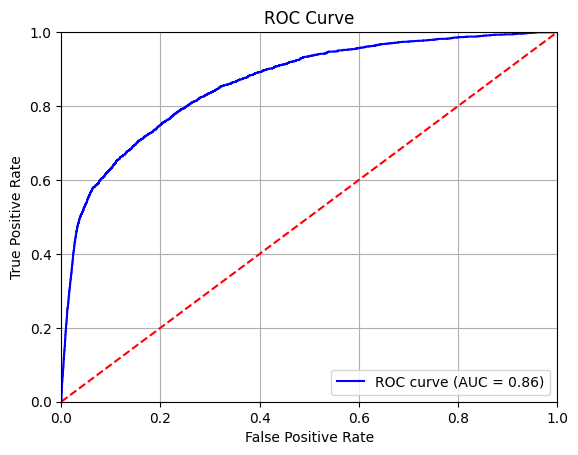

AUC: 0.8627


In [ ]:
Y_scores_logi = model.predict_proba(X_val_logi)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_val_logi, Y_scores_logi)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"AUC: {roc_auc:.4f}") #Area under the curve

[Q17] Report TP, TN, FP, FN
---
Report the number of true positive, true negative, false positive, and false negative on
the validation set with the last model in [Q15]. Discuss why these numbers are helpful in
comparison to solely relying on the F1 score, especially on the healthcare dataset.

In [ ]:
Y_pred_logi = model.predict(X_val_logi)

cm = confusion_matrix(Y_val_logi, Y_pred_logi)
TN, FP, FN, TP = cm.ravel()

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 531
True Negatives (TN): 36766
False Positives (FP): 452
False Negatives (FN): 1615


These numbers are helpful since each of these numbers provide a deeper understanding of each person. In healthcare, it is crucial to reduce false positives and false negatives, as this result  may lead to a worse scenario. Hence, F1 score could only provide a brief asaessment of the model performance, but TP TN FP FN could bring a deeper insight.

7.2 Feedforward Neural Networks
---
Neural network classifiers generalize logistic regression by introducing one or more hidden layers.
Their learning algorithm is similar to that for logistic regression, as described above. Remember
to standardize the features before training and validation.

You need to try different numbers of hidden units H ∈ {1, 8, 32, 128} to build different three-
hidden-layer neural networks. The hyperparameter early stopping can be set to 'True' to avoid
overfitting (default is 'False'). The other hyperparameters may just take their default values.
During training, you are expected to record the training time of each model. After training,
evaluate your models using accuracy and the F1 score on the validation set. You have to report
the accuracy and F1 score for each value of H by plotting them using matplotlib

[Q18] Model Report
---
Report the model setting, training time, and performance of the neural networks for each
value of H. You are also expected to repeat each setting three times and report the mean and
standard deviation of the training time, accuracy, and the F1 score for each setting.

In [ ]:
X_train_fnn2, X_val_fnn2, Y_train_fnn2, Y_val_fnn2 = train_test_split(X_classification, Y_classification, test_size=0.2, random_state=4211)
hidden_units = [1, 8, 32, 128]
results = []

for units in hidden_units:
  train_times = []
  accuracy_scores = []
  r2_scores = []
  f1_scores = []

  for _ in range(3):
    model_classifier_fnn = MLPClassifier(hidden_layer_sizes=(units,), random_state=4211, early_stopping=True)

    start_time = time.time()
    model_classifier_fnn.fit(X_train_fnn2, Y_train_fnn2)
    end_time = time.time()

    train_times.append(end_time - start_time)
    predictions_fnn2 = model_classifier_fnn.predict(X_val_fnn2)

    accuracy = accuracy_score(Y_val_fnn2, predictions_fnn2)
    f1 = f1_score(Y_val_fnn2, predictions_fnn2)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    results.append({
        'hidden_units': units,
        'mean_train_time': np.mean(train_times),
        'std_train_time': np.std(train_times),
        'mean_accuracy': np.mean(accuracy_scores),
        'std_accuracy': np.std(accuracy_scores),
        'mean_f1': np.mean(f1_scores),
        'std_f1': np.std(f1_scores)
    })

In [ ]:
results_df = pd.DataFrame(results)
print(results_df.to_string())

    hidden_units  mean_train_time  std_train_time  mean_accuracy  std_accuracy   mean_f1  std_f1
0              1         6.119864        0.000000       0.948964  0.000000e+00  0.282244     0.0
1              1         5.584085        0.535779       0.948964  0.000000e+00  0.282244     0.0
2              1         6.688652        1.622193       0.948964  0.000000e+00  0.282244     0.0
3              8        10.352607        0.000000       0.948100  0.000000e+00  0.288401     0.0
4              8         9.868442        0.484164       0.948100  0.000000e+00  0.288401     0.0
5              8        10.213109        0.627588       0.948100  0.000000e+00  0.288401     0.0
6             32        11.706195        0.000000       0.948557  0.000000e+00  0.293687     0.0
7             32        11.356325        0.349870       0.948557  0.000000e+00  0.293687     0.0
8             32        11.137543        0.421114       0.948557  0.000000e+00  0.293687     0.0
9            128        23.254

[Q19] Accuracy and F1 score
---
Plot the accuracy and F1 score for each value of H. Suggest a possible reason for the gap
between the accuracy and F1 score.

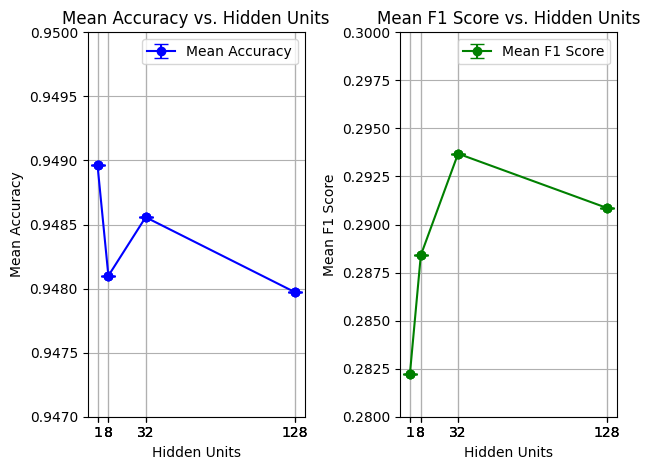

In [ ]:
hidden_units = results_df['hidden_units']
mean_accuracy = results_df['mean_accuracy']
std_accuracy = results_df['std_accuracy']
mean_f1 = results_df['mean_f1']
std_f1 = results_df['std_f1']

plt.figure()

plt.subplot(1, 2, 1)
plt.errorbar(hidden_units, mean_accuracy, yerr=std_accuracy, fmt='o-', capsize=5, label='Mean Accuracy', color='blue')
plt.title('Mean Accuracy vs. Hidden Units')
plt.xlabel('Hidden Units')
plt.ylabel('Mean Accuracy')
plt.xticks(hidden_units)
plt.ylim([0.947,0.95])
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.errorbar(hidden_units, mean_f1, yerr=std_f1, fmt='o-', capsize=5, label='Mean F1 Score', color='green')
plt.title('Mean F1 Score vs. Hidden Units')
plt.xlabel('Hidden Units')
plt.ylabel('Mean F1 Score')
plt.xticks(hidden_units)
plt.ylim(0.28,0.30)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

[Q20] Model Comparison
---
Compare the training time, accuracy, and the F1 score of the logistic regression model
and the best neural network model

[Q21] Trend
---
Do you notice any trend when you increase the hidden layer size from 1 to 128? If so,
please describe what the trend is and suggest a reason for your observation.

[Q22] ROC curve
---
Plot the ROC curve calculated on the validation set with the hidden layer size of 1 and the
hidden layer size of 128. Give one reason why we need to examine the ROC curve as well.

<ipython-input-23-3a2b0afa25ec>:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


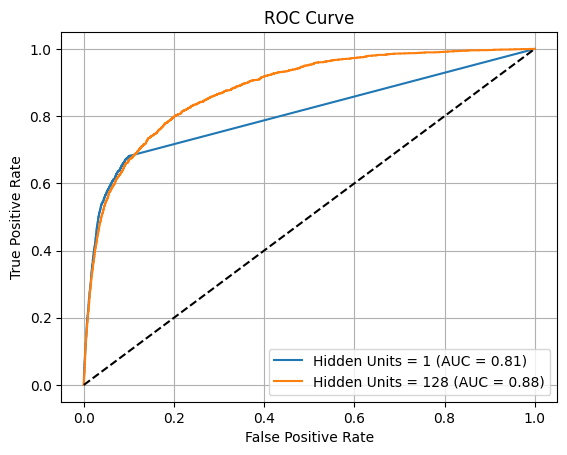

In [ ]:
hidden_layer_sizes = [1, 128]
models = {}
predictions = {}

for units in hidden_layer_sizes:
  model_classifier = MLPClassifier(hidden_layer_sizes=(units,), random_state=4211, early_stopping=True)
  model_classifier.fit(X_train_fnn2, Y_train_fnn2)
  predictions[units] = model_classifier.predict_proba(X_val_fnn2)[:, 1]

plt.figure()
for units in hidden_layer_sizes:
  fpr, tpr, _ = roc_curve(Y_val_fnn2, predictions[units])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'Hidden Units = {units} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**8 Bonus: Performance Enhancement**
===
The questions in this section are optional and designed to provide additional scoring opportunities and help students explore more on enhancing model performance. The maximum possible score for this assignment remains 100 points. If you lose points in Parts 1 to 4, the bonus points from this section can help recover your score up to the maximum.



8.1 Preprocessing Validation
===
In this task, you will build a logistic regression model as well as neural network classifiers to predict whether or not the classification target 'HadHeartAttack' is 'true'. You are also required to use the train test split submodule in scikit-learn to split the data, with 80% for training and 20% for validation. As before, we ask that you set random state = 4211 for reproducibility. This section aims to demonstrate the impact of different preprocessing techniques on model performance by constructing and evaluating multiple pipelines.

This task is designed to provide hands-on experience with sklearn's Pipeline and ColumnTransformer utilities, enabling efficient experimentation with various preprocessing strategies.

You could use Pipeline to create a sequence of preprocessing steps for numerical and categorical data separately. Then, ColumnTransformer could be used to apply the respective pipelines to your dataset's numerical and categorical columns.

Your task is to evaluate how different preprocessing
combinations affect the performance of three-hidden-layer neural networks to predict whether or not the target 'HadHeartAttack' is true.

[Q23] Combination A
---
For numerical features, apply SimpleImputer with mean strategy for
imputation. For categorical features, use OneHotEncoder for encoding. Normalize all features
with StandardScaler. Do not apply feature selection and feature engineering. Validate this
combination with a neural network model.

In [ ]:
X = train_data.drop('HadHeartAttack', axis=1)
Y = train_data['HadHeartAttack']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
categorical_pipeline = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[('num', numerical_pipeline, numerical_cols),('cat', categorical_pipeline, categorical_cols)])

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=4211)

mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), random_state=4211, early_stopping=True)

a_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', mlp)])
a_pipeline.fit(X_train, Y_train)

Y_pred_a = a_pipeline.predict(X_val)
accuracy = accuracy_score(Y_val, Y_pred_a)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.948175998374149


In [ ]:
print("Neural Network Performance:")
print(classification_report(Y_val, Y_pred_a))

Neural Network Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     37218
           1       0.55      0.27      0.36      2146

    accuracy                           0.95     39364
   macro avg       0.75      0.63      0.67     39364
weighted avg       0.94      0.95      0.94     39364



[Q24] Combination B
---
For numerical features, use StandardScaler for normalization and
SimpleImputer with zero strategy for imputation. For categorical features, encode ordinal features with OrdinalEncoder and remaining with OneHotEncoder. Do not apply feature selection
and feature engineering. Validate this combination with a neural network model.

In [ ]:
ordinal_features = {
    'LastCheckupTime': ['Within past year (anytime less than 12 months ago)',
                        '1 year but less than 2 years ago (Within past 2 years)',
                        '2 year but less than 5 years ago (Within past 5 years)',
                        '5 or more years ago'],
    'RemovedTeeth': ['0', '1 to 5', '6 or more, but not all', 'All'],
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'ECigaretteUsage': ['Never used e-cigarettes in my entire life',
                        'Not at all (right now)', 'Use them a few days', 'Use them every day']
}

ordinal_cols = list(ordinal_features.keys())

numerical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
ordinal_pipeline = Pipeline(steps=[('ordinal_encoder', OrdinalEncoder())])
categorical_pipeline = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('ord', ordinal_pipeline, ordinal_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

mlp = MLPClassifier(hidden_layer_sizes=(32,32,32),random_state=4211)

b_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', mlp)])
b_pipeline.fit(X_train, Y_train)

Y_pred_b = b_pipeline.predict(X_val)
accuracy = accuracy_score(Y_val, Y_pred_b)
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 0.9416979981709176


In [ ]:
print("Neural Network Performance:")
print(classification_report(Y_val, Y_pred_b))

Neural Network Performance:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     37218
           1       0.44      0.24      0.31      2146

    accuracy                           0.94     39364
   macro avg       0.70      0.61      0.64     39364
weighted avg       0.93      0.94      0.93     39364



[Q25] Combination C
---
Create a custom combination where you choose a different preprocessing technique for numerical and categorical features based on your hypothesis of what might work best. This could also involve custom encoders, any appropriate feature selection, or engineering
techniques. Validate this combination with a neural network model.

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns.difference(ordinal_cols)

ordinal_pipeline = Pipeline(steps=[('ordinal_encoder', OrdinalEncoder())])
numerical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
categorical_pipeline = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('ord', ordinal_pipeline, ordinal_cols),
        ('cat', categorical_pipeline, categorical_cols)])

X_train_transformed = preprocessor.fit_transform(X_train)

k_best_selector = SelectKBest(score_func=f_classif, k=20)
k_best_selector.fit(X_train_transformed, Y_train)

scores = k_best_selector.scores_
feature_scores = pd.DataFrame({'Feature': range(X_train_transformed.shape[1]), 'Score': scores})
sorted_feature_scores = feature_scores.sort_values(by='Score', ascending=False)

selected_features_mask = k_best_selector.get_support()
selected_features = feature_scores['Feature'][selected_features_mask]

X_train_selected = k_best_selector.transform(X_train_transformed)

X_val_transformed = preprocessor.transform(X_val)
X_val_selected = k_best_selector.transform(X_val_transformed)

mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), random_state=4211, early_stopping=True)
c_pipeline = Pipeline([('classifier', mlp)])
c_pipeline.fit(X_train_selected, Y_train)

Y_pred_c = c_pipeline.predict(X_val_selected)

accuracy = accuracy_score(Y_val, Y_pred_c)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9475663042373742


In [ ]:
print("Neural Network Performance:")
print(classification_report(Y_val, Y_pred_c))

Neural Network Performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     37218
           1       0.56      0.19      0.28      2146

    accuracy                           0.95     39364
   macro avg       0.76      0.59      0.63     39364
weighted avg       0.93      0.95      0.94     39364



8.2 Hyperparameter Tuning
===
In this task, you need to use grid search to tune the hyperparameters of a three-hidden-layer feedforward neural network model to predict whether or not the target 'HadHeartAttack' is true.

All the hyperparameters defined in the MLPClassifier class in scikit-learn except the number of hidden layers can be tuned. Use one of the preprocessing techniques in [Q23-25] and features selected in [Q8] for training and testing.

You are required to use the model selection submodule in scikit-learn to facilitate performing grid search cross-validation for hyperparameter tuning. This is done by randomly sampling
80% of the training instances to train a classifier and then validating it on the remaining 20%.

Five such random data splits are performed and the average over these five trials is used to
estimate the generalization performance. You are expected to try at least 10 combinations of the hyperparameter setting. Set the random state hyperparameter of the neural network model to 4211 for reproducibility and early stopping to 'True' to avoid overfitting.

[Q26] Report on hyperparameter setting
---
Report five combinations of the hyperparameter settings and highlight the best hyperparameter setting in terms of validation accuracy.

You also need to report the mean and standard deviation of the validation accuracy for the five random data splits for each perparameter setting.

Finally, you need to evaluate the model with the best hyperparameter setting on the testing set and report the testing accuracy.

In [ ]:
numerical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
ordinal_pipeline = Pipeline(steps=[('ordinal_encoder', OrdinalEncoder())])
categorical_pipeline = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('ord', ordinal_pipeline, ordinal_cols),
    ('cat', categorical_pipeline, categorical_cols)])


param_grid = {
    'classifier__hidden_layer_sizes': [(64, 32, 16), (32, 16, 8)],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__alpha': [0.0001, 0.001],
    'classifier__batch_size': [32, 64],
}

mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), random_state=4211, early_stopping=True)

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', mlp)])

grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid,cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")

cv_results = grid_search.cv_results_
for mean, std, params in zip(cv_results['mean_test_score'], cv_results['std_test_score'], cv_results['params']):
  print(f"Parameters: {params}\nAccuracy: {mean:.6f}\nStandard Deviation: {std:.6f}\n") #Note: Accuracy = Mean Accuracy

best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_val)

test_accuracy = accuracy_score(Y_val, Y_pred)
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(Y_val, Y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'classifier__activation': 'tanh', 'classifier__alpha': 0.0001, 'classifier__batch_size': 32, 'classifier__hidden_layer_sizes': (64, 32, 16)}
Parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__batch_size': 32, 'classifier__hidden_layer_sizes': (64, 32, 16)}
Accuracy: 0.948797
Standard Deviation: 0.000601

Parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__batch_size': 32, 'classifier__hidden_layer_sizes': (32, 16, 8)}
Accuracy: 0.948658
Standard Deviation: 0.000702

Parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__batch_size': 64, 'classifier__hidden_layer_sizes': (64, 32, 16)}
Accuracy: 0.948454
Standard Deviation: 0.000701

Parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__batch_size': 64, 'classifier__hidden_layer_sizes': (32, 16, 8)}
Accuracy: 0.94

In [ ]:
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters Used in best_model:")
for param, value in best_hyperparameters.items():
  print(f"{param}: {value}")

Best Hyperparameters Used in best_model:
classifier__activation: tanh
classifier__alpha: 0.0001
classifier__batch_size: 32
classifier__hidden_layer_sizes: (64, 32, 16)
